# 🌸 Iris Species Classifier
This project builds a machine learning model to classify Iris flowers into one of three species: **Setosa**, **Versicolor**, or **Virginica** using sepal and petal measurements.

We'll explore the dataset, apply multiple feature engineering techniques, train several models, and compare their performance using cross-validation to select the best final model.


In [1]:
# importing all the models
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset from seaborn
df = sns.load_dataset('iris')

In [4]:
# viewing the first few lines
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 🔍 Data Exploration and EDA

We begin with loading the Iris dataset and performing exploratory data analysis to understand feature distributions, class separability, and feature correlations.

#### Basic EDA Checklist
1. Basic info
2. Distribution of Features
3. Pairwise Feature Relationship (Pairplot)
4. Boxplot for Outliers
5. Correlation matrix

In [5]:
# 1. basic info
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000   

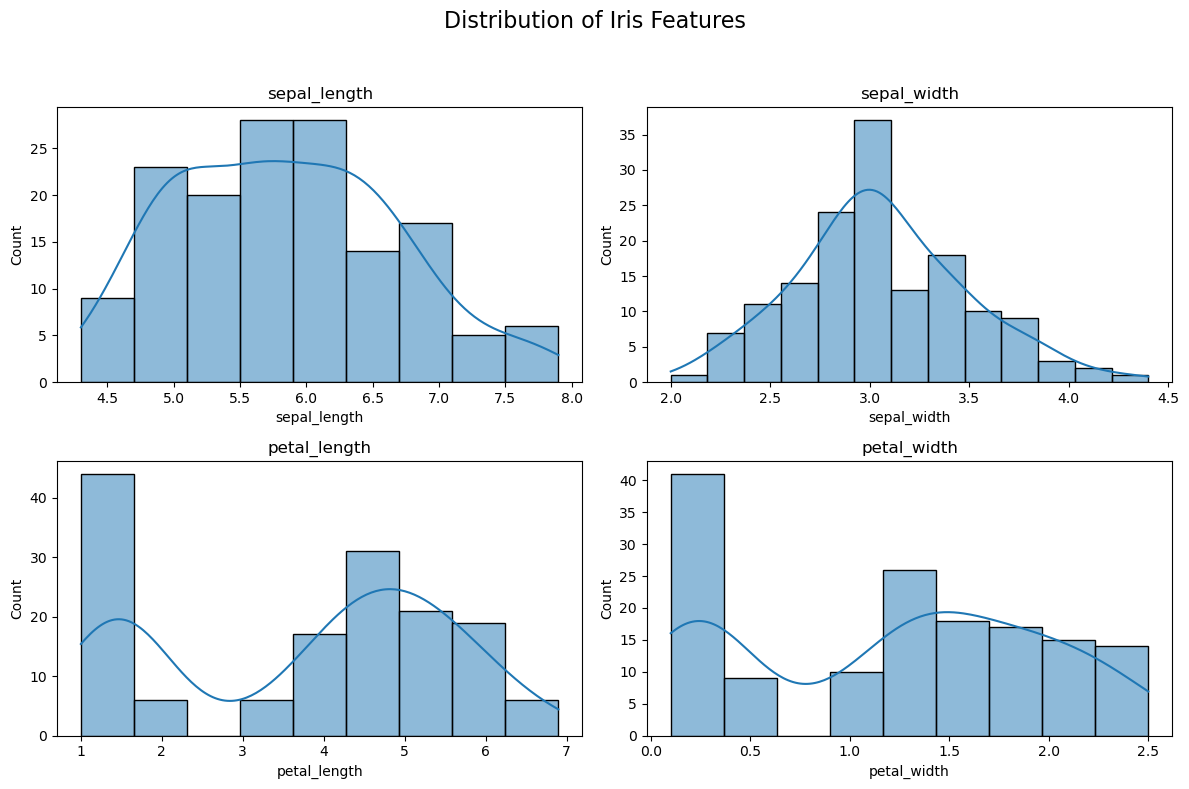

In [6]:
# 2. Distribution of features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create a single figure with 4 subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Iris Features", fontsize=16)

# Plot each feature in a subplot
for ax, feature in zip(axes.flat, features):
    sns.histplot(data=df, x=feature, kde=True, ax=ax)
    ax.set_title(f"{feature}")

# Adjust the layout and save image
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.savefig("images/distribution_all_features.png")
plt.show()

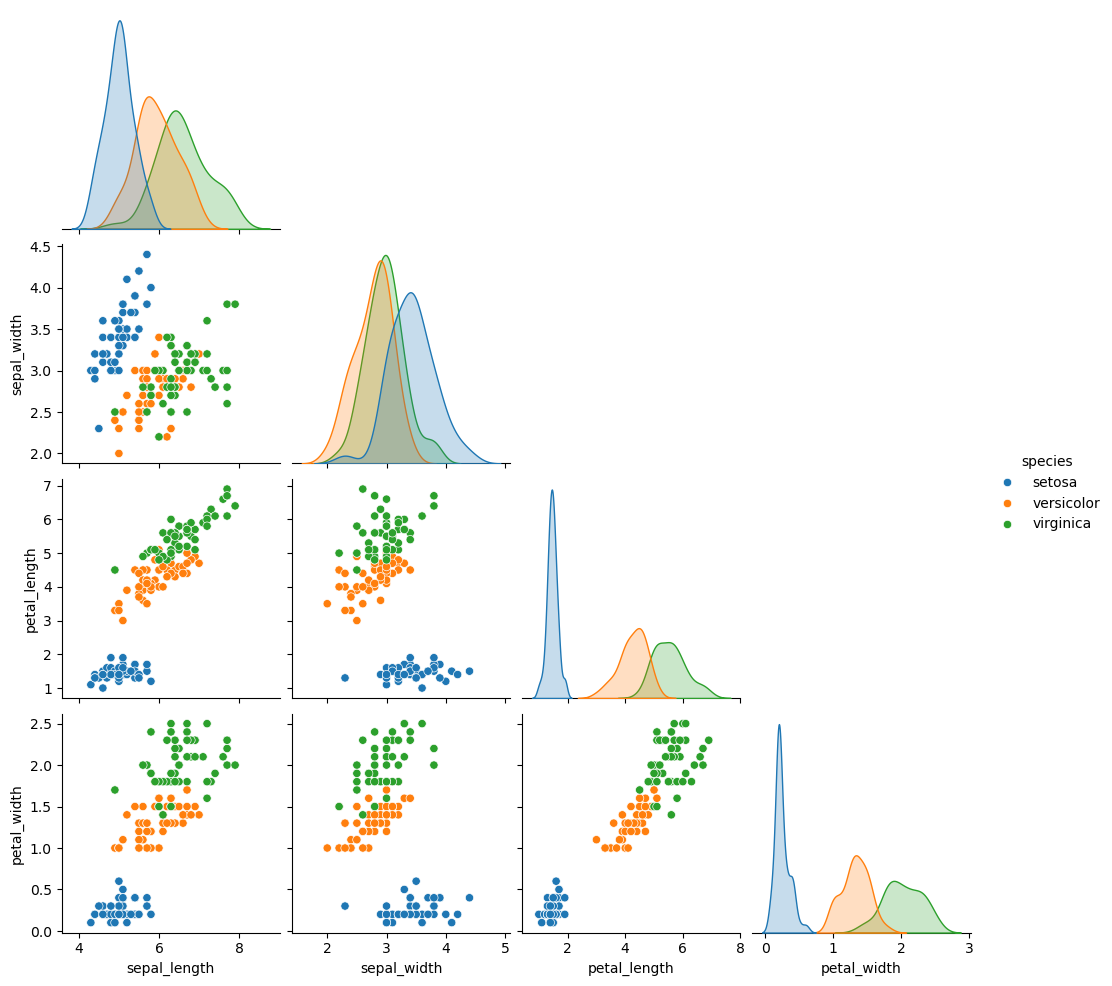

In [7]:
# 3. Pairplot 
sns.pairplot(data=df, hue='species', corner=True)
plt.savefig("images/pairplot.png")

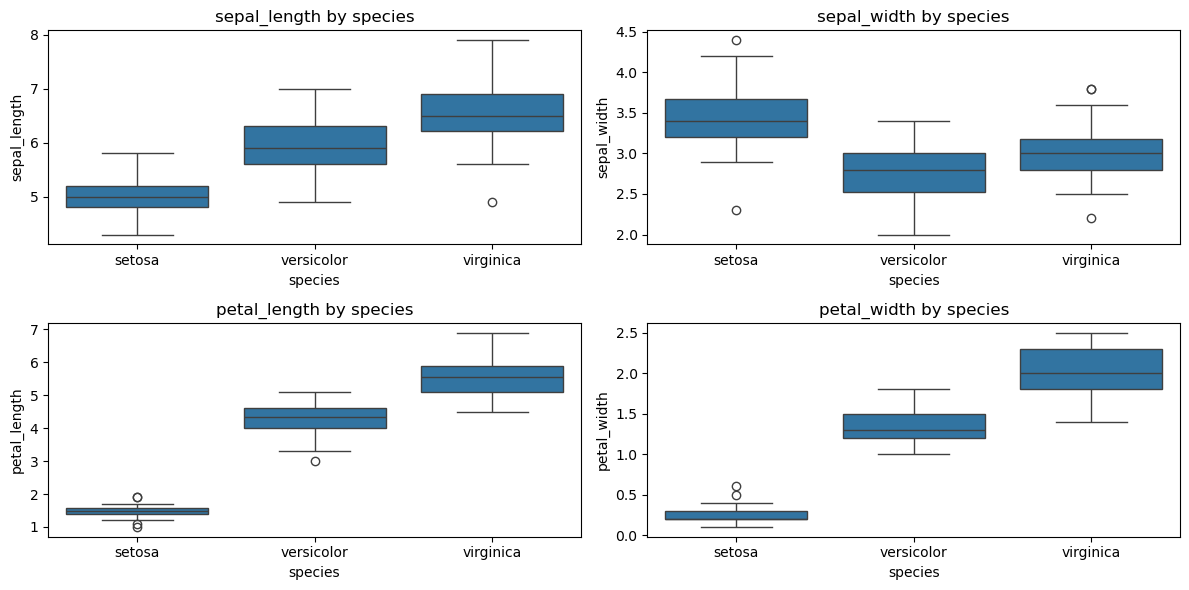

In [8]:
# 4. Boxplot by Species
plt.figure(figsize=(12, 6))
for item, feature in enumerate(features):
    plt.subplot(2, 2, item+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by species')
plt.tight_layout()
plt.savefig(f"images/boxplot.png") 
plt.show()


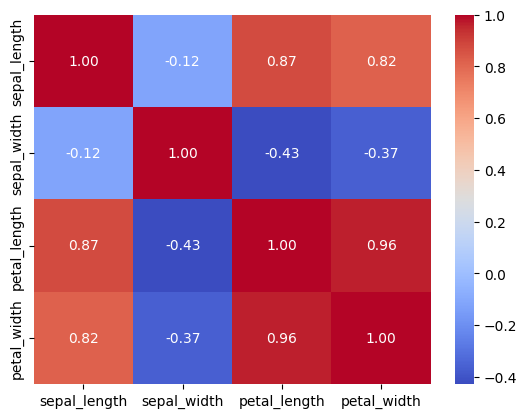

In [54]:
 # 5. Correlation Matrix
corr = df.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") 
plt.savefig(f"images/coorelation_matrix.png")

## 🧪 Baseline Model (All 4 Features, Logistic Regression)

We train a simple logistic regression model on all four features without any transformations. This will serve as our baseline for comparison.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# separate features from target and assign
X = df.drop('species', axis= 1)
y = df['species']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
# Fit the logistic model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [27]:
#Evaluate the model
y_pred = model.predict(X_test_scaled)

print("classification_report")
print(classification_report(y_test, y_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


# Exploring feature engineering

## Experiment 1:
Using Only Petal Features

In [29]:
# using only petal features
X_petal = df[['petal_length', 'petal_width']]
y_petal = df["species"]

#train-test split
X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X_petal, y_petal, test_size=0.2,
                                                                             random_state=42, stratify=y_petal)
#Standardize the features
X_train_petal_scaled = scaler.fit_transform(X_train_petal)
X_test_petal_scaled = scaler.fit_transform(X_test_petal)

#fit the model
model_petal = LogisticRegression(max_iter=200)
model_petal.fit(X_train_petal_scaled, y_train_petal)

#predict the values
y_pred_petal = model_petal.predict(X_test_petal_scaled)
print("classification_report (petal features only)")
print(classification_report(y_pred_petal, y_test_petal))
print("confusion_matrix (Petal features only)")
print(confusion_matrix(y_pred_petal, y_test_petal))

classification_report (petal features only)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

confusion_matrix (Petal features only)
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


### Experiment 2:

Drop One Correlated Feature (petal_width)

In [ ]:
# drop and assign  
X_corr = df.drop(columns=['species', 'petal_width'])
y_corr = df['species']

# train-test spilt
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.2,
                                                                         random_state=42, stratify=y_corr)
# standardize the features
X_train_corr_scaled = scaler.fit_transform(X_train_corr)
X_test_corr_scaled = scaler.fit_transform(X_test_corr)

#Fit the model
model_corr = LogisticRegression(max_iter=200)
model_corr.fit(X_train_corr_scaled, y_train_corr)

#predition
y_pred_corr = model_corr.predict(X_test_corr_scaled)

#results
print("classification_report (Drop One Correlated Feature (petal_width))")
print(classification_report(y_pred_corr, y_test_corr))
print("confusion_matrix (Drop One Correlated Feature (petal_width))")
print(confusion_matrix(y_pred_corr, y_test_corr)) j

classification_report (Drop One Correlated Feature (petal_width))
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

confusion_matrix (Drop One Correlated Feature (petal_width))
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


## Experiment 3:
Add Polynomial Features

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# assign the values and drop target
X_poly = df.drop(columns=['species'], axis=1)
y_poly = df['species']

#train-test split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2,
                                                                         random_state=42, stratify=y_poly)

# create a pipeline
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=200))
])

# fit the model
poly_pipeline.fit(X_train_poly, y_train_poly)

# predit the test
y_pred_poly = poly_pipeline.predict(X_test_poly)

print("Classification Report (Polynomial Features):")
print(classification_report(y_test_poly, y_pred_poly))

print("Confusion Matrix (Polynomial Features):")
print(confusion_matrix(y_test_poly, y_pred_poly))

Classification Report (Polynomial Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix (Polynomial Features):
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## Experiment 4:
Add Interaction Terms Only (No Squared Terms)

In [33]:
# assign and drop
X = df.drop(columns='species')
y = df['species']

# Train-test split
X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# to the pipeline, add interaction terms only (no squares)
interaction_pipeline = Pipeline([
    ('interactions', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=300))
])

# Train the model
interaction_pipeline.fit(X_train_inter, y_train_inter)

# Evaluate
y_pred_inter = interaction_pipeline.predict(X_test_inter)
print("Classification Report (Interaction Terms Only):")
print(classification_report(y_test_inter, y_pred_inter))

print("Confusion Matrix (Interaction Terms Only):")
print(confusion_matrix(y_test_inter, y_pred_inter))


Classification Report (Interaction Terms Only):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix (Interaction Terms Only):
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [36]:
from sklearn.decomposition import PCA

# drop and assign
X_PCA = df.drop(columns='species')
y_PCA = df['species']

#train-test split 
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2,
                                                                     random_state=42, stratify=y_PCA)
# add PCA into the pipeline
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('logreg', LogisticRegression(max_iter=200))
])

# fit the model
pca_pipeline.fit(X_train_PCA, y_train_PCA)

# 5. predict and evaluate
y_pred_PCA = pca_pipeline.predict(X_test_PCA)
print("Classification Report (PCA):")
print(classification_report(y_test_PCA, y_pred_PCA))

print("Confusion Matrix (PCA):")
print(confusion_matrix(y_test_PCA, y_pred_PCA))

Classification Report (PCA):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix (PCA):
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


## Experiment 6
Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# assign and drop
X = df.drop(columns='species')
y = df['species']

# train-test split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# fir the training paprm with decision tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tree, y_train_tree)

# predict and evaluate
y_pred_tree = tree_model.predict(X_test_tree)
print("Classification Report (Decision Tree):")
print(classification_report(y_test_tree, y_pred_tree))

print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test_tree, y_pred_tree))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix (Decision Tree):
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


## Experiment 7: Part 1 (C = 0.1)
Regularized Logistic Regression (L2 / Ridge Penalty)

In [43]:
# data prep
X = df.drop(columns='species')
y = df['species']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# using the pipeline and standardize + L2-regularized logistic regression
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=0.1, penalty='l2', max_iter=200))  # C=0.1 = stronger regularization
])

# fit
reg_pipeline.fit(X_train_reg, y_train_reg)

# 4. Evaluate
y_pred_reg = reg_pipeline.predict(X_test_reg)
print("Classification Report (L2 Regularized LR, C=0.1):")
print(classification_report(y_test_reg, y_pred_reg))

print("Confusion Matrix (L2 Regularized):")
print(confusion_matrix(y_test_reg, y_pred_reg))

Classification Report (L2 Regularized LR, C=0.1):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.70      0.78        10
   virginica       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30

Confusion Matrix (L2 Regularized):
[[10  0  0]
 [ 0  7  3]
 [ 0  1  9]]


## Experiment 7: Part 2 (C = 10.0)
Regularized Logistic Regression (L2 / Ridge Penalty)

In [44]:
# data prep
X = df.drop(columns='species')
y = df['species']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# using the pipeline and standardize + L2-regularized logistic regression
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=10.0, penalty='l2', max_iter=200))  # C=0.1 = stronger regularization
])

# fit
reg_pipeline.fit(X_train_reg, y_train_reg)

# 4. Evaluate
y_pred_reg = reg_pipeline.predict(X_test_reg)
print("Classification Report (L2 Regularized LR, C=0.1):")
print(classification_report(y_test_reg, y_pred_reg))

print("Confusion Matrix (L2 Regularized):")
print(confusion_matrix(y_test_reg, y_pred_reg))

Classification Report (L2 Regularized LR, C=0.1):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix (L2 Regularized):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


## Verification Using Cross-Validation 

In [40]:
from sklearn.model_selection import cross_val_score

# data prep
X = df.drop(columns='species')
y = df['species']

# using the same Pipeline as above (standardize + L2 logistic regression)
cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=10, penalty='l2', max_iter=200))
])

# 5-Fold Cross-Validation
scores = cross_val_score(cv_pipeline, X, y, cv=5)

print("Cross-validated scores for each fold:", scores)
print("Mean accuracy across all folds:", scores.mean())

Cross-validated scores for each fold: [1.         1.         0.93333333 0.93333333 1.        ]
Mean accuracy across all folds: 0.9733333333333334


## 📈 Cross-Validation

To confirm the generalizability of our models, we perform 5-fold cross-validation on both the baseline (`C=1`) and final model (`C=10`).

The final model achieved a mean accuracy of **97.33%**, outperforming the baseline (96.00%), with stable performance across folds.


In [42]:
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C=1.0, penalty='l2', max_iter=200))  # Baseline
])

# Cross-validate on entire dataset
baseline_scores = cross_val_score(baseline_pipeline, X, y, cv=5)

print("Cross-validated scores for baseline (C=1):", baseline_scores)
print("Mean accuracy for baseline (C=1):", baseline_scores.mean())

Cross-validated scores for baseline (C=1): [0.96666667 1.         0.93333333 0.9        1.        ]
Mean accuracy for baseline (C=1): 0.9600000000000002


## ✅ Final Model Summary

**Best Model**: Logistic Regression with L2 regularization (`C=10`)  
**Features Used**: All 4 original features  
**Evaluation**: 97.33% mean accuracy via 5-fold cross-validation  
**Why It Works**: 
- Iris dataset is clean and well-separated
- Regularization helps fine-tune weights
- Cross-validation confirmed no overfitting

This model is accurate, interpretable, and simple.
